## <font color='darkblue'>Preface</font>
([article source](https://analyticsindiamag.com/building-and-modelling-a-graph-neural-network-from-scratch/)) <font size='3ptx'><b>Graph neural networks that can operate on the graph data can be considered graph neural networks. Using graph data any neural network is required to perform tasks using the vertices or nodes of the data.</b></font>

<b><font color='darkblue'>Graph neural networks</font> are one of the most emerging techniques in the field of <a href='https://analyticsindiamag.com/understanding-difference-deep-learning-machine-learning/'>machine learning and deep learning</a>.</b> In many of the research works, we can see the success of these networks in the context of results and speed. One of the major reasons behind the success of graph neural networks is that they use graph data for modelling and graph data can consist of the structural relationship between the entities of the dataset. <b>In this article, we are going to learn how to build and perform modelling with graph neural networks by building and implementing them from scratch. The major points to be covered in this article are listed below.</b>

<a id='sect0'></a>
### <font color='darkgreen'>Table of contents</font>
1. <font size='3ptx'><b><a href='#sect1'>What is a graph neural network? </a></b></font>
2. <font size='3ptx'><b><a href='#sect2'>Understanding the data</a></b></font>
    1. <b><a href='#sect2_1'>Downloading dataset</a></b>
    2. <b><a href='#sect2_2'>Visualizing data</a></b>
    3. <b><a href='#sect2_3'>Making graph data</a></b>
3. <font size='3ptx'><b><a href='#sect3'>Implement graph neural network implementation </a></b></font>
    1. <b><a href='#sect3_1'>Graph layer</a></b>
    2. <b><a href='#sect3_2'>Graph neural node classifier </a></b>
4. <font size='3ptx'><b><a href='#sect4'>Fitting model</a></b></font>
    1. <b><a href='#sect4_1'>Instantiating GNN model</a></b>
    2. <b><a href='#sect4_2'>Defining training data</a></b>
    3. <b><a href='#sect4_3'>Training model</a></b>
    4. <b><a href='#sect4_4'>Visualizing the results</a></b>
    
<br/>

Let’s begin with understanding what a graph neural network is.

In [59]:
import warnings

warnings.filterwarnings('ignore')

<a id='sect1'></a>
## <font color='darkblue'>What is a graph neural network? </font>
<a href='https://analyticsindiamag.com/how-to-use-graph-neural-networks-for-text-classification/'>In one of our articles</a>, we have discussed that neural networks that can operate on the graph data can be considered graph neural networks. <b>Using graph data any neural network is required to perform tasks using the vertices or nodes of the data.</b> Let’s say we are performing any classification task using any GNN then the network is required to classify the vertices or nodes of the graph data. <b>In graph data, nodes should be presented with their labels so that every node can be classified by their labels according to the neural networks</b>.

Since in most of the datasets we find that structural relationship between the entities of data we can use the graph neural networks in place of other ML algorithms and can utilize the benefits of using graph data in modelling. The benefits of graph data can be found <a href='https://analyticsindiamag.com/a-guide-to-self-supervised-learning-with-graph-data/'>here</a>.

<b>In this article, we are going to implement a convolutional graph neural network using the Keras and TensorFlow libraries. In this implementation, we will try to use the graph neural network for a node prediction task.</b>

<a id='sect2'></a>
## <font color='darkblue'>Understanding the data</font>
* <b><a href='#sect2_1'>Downloading dataset</a></b>
* <b><a href='#sect2_2'>Visualizing data</a></b>
* <b><a href='#sect2_3'>Making graph data</a></b>

<b><font size='3ptx'>Using a graph neural network requires graph data</font>. In this article, we are using the [Cora dataset](https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz). This data set includes 2708 scientific papers that are already classified in 7 classes with 5429 links</b>. Let’s start implementing graph neural network modelling with downloading datasets.

<a id='sect2_1'></a>
### <font color='darkgreen'>Downloading dataset</font>

In [1]:
import os
from tensorflow import keras

zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

2022-02-02 15:29:21.183747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 15:29:21.183785: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


180224/168052 [================================] - 0s 3us/step


In [2]:
data_dir

'/root/.keras/datasets/cora'

The dataset includes two files:
* <font color='olive'><b>cora.cites</b></font>: Includes the citation records
* <font color='olive'><b>cora.content</b></font>: Includes the paper content records
<br/>

We can see in the output we have two download records.

In [4]:
import pandas as pd

citations_data = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)

In [8]:
citations_data.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


In [5]:
# Describing the dataset as,
citations_data.describe()

,target,source
count,5429.000000,5.429000e+03
mean,115009.455148,5.604759e+05
std,188229.783205,4.710471e+05
min,35.000000,3.500000e+01
25%,6334.000000,7.855200e+04
50%,31353.000000,5.233940e+05
75%,119686.000000,1.113995e+06
max,954315.000000,1.155073e+06


In the description of the data, we can see that <b>the data frame has two variables `target` and `source` and the count of the total values are 5429. Let’s convert the core content into a data frame</b>.

In [6]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]

papers_data = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)

In [7]:
# Describing the papers data as,
print("Papers shape:", papers_data.shape)
papers_data.head()

Papers shape: (2708, 1435)


,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In the output, we can see that <b>this data has 2708 rows and 1435 columns in it with the `subject` name. Now we are required to provide label encoding to paper ids and `subject` columns</b>.

In [9]:
class_values = sorted(papers_data["subject"].unique())
class_values

['Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory']

In [11]:
paper_id_values = sorted(papers_data["paper_id"].unique())
paper_id_values[:10]

[35, 40, 114, 117, 128, 130, 164, 288, 424, 434]

In [13]:
class_idc = {name: id for id, name in enumerate(class_values)}
paper_idc = {name: idx for idx, name in enumerate(paper_id_values)}
 
papers_data["paper_id"] = papers_data["paper_id"].apply(lambda name: paper_idc[name])
citations_data["source"] = citations_data["source"].apply(lambda name: paper_idc[name])
citations_data["target"] = citations_data["target"].apply(lambda name: paper_idc[name])
papers_data["subject"] = papers_data["subject"].apply(lambda value: class_idc[value])

<a id='sect2_2'></a>
### <font color='darkgreen'>Visualizing data</font>
Let’s visualize the graph data using the following lines of codes:

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

colors = papers_data["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations_data.sample(n=1500))  # 1500 edges -> one edge with two nodes

<Figure size 1080x2160 with 0 Axes>

In [42]:
graph_nodes = list(cora_graph.nodes)
graph_nodes[:10]

[2026, 627, 2608, 131, 2659, 760, 262, 5, 2034, 220]

In [43]:
# Total 1500 edges are coming from 1643 nodes
len(list(cora_graph.nodes))

1656

In [49]:
subjects = []
for paper_id in graph_nodes:
    subjects.append(list(papers_data[papers_data['paper_id']==paper_id]['subject'])[0])
    
subjects[:10]

[6, 6, 0, 0, 0, 0, 4, 4, 6, 6]

In [50]:
len(subjects)

1656

In [36]:
papers_data[papers_data['paper_id']==list(cora_graph.nodes)[0]][['paper_id', 'subject']]

,paper_id,subject
2004,2026,6


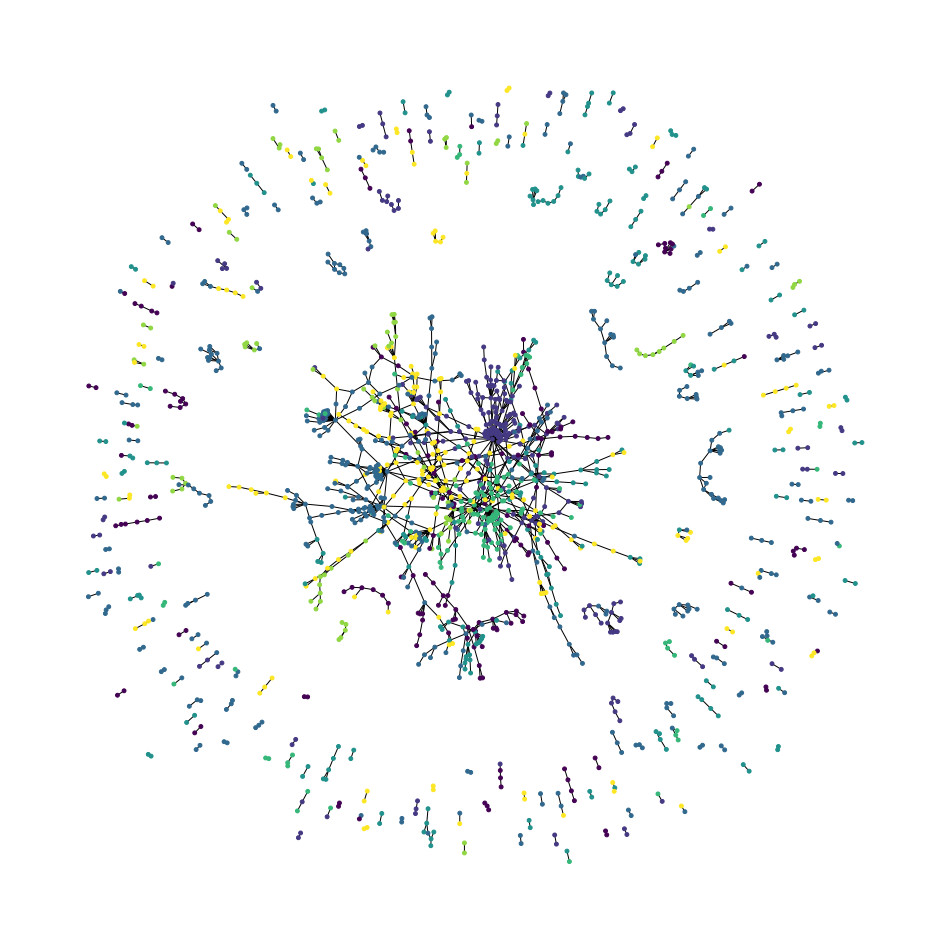

In [51]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html?highlight=draw_networkx#networkx.drawing.nx_pylab.draw_networkx
plt.figure(figsize=(13, 13))
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

In the output, we can see that node is a representation of the graph and the colours of the nodes represent different subjects in the data. As we have discussed that graph neural networks work on the graph data, we are required to convert these data frames into graph data. 

<a id='sect2_3'></a>
### <font color='darkgreen'>Making graph data</font>
<b>In this section of the article, we will see how we can convert the data frame into graph data</b>. Here we will see a basic approach to generate graph data. A basic graph data can consist of the following elements:
* <b>Node features</b>: This element represents the num of nodes and num of features in an array. The dataset we are using in this article has paper information that can be used as the nodes and the node_features are the word-presence binary vectors of each paper.
* <b>Edges</b>: This is a sparse matrix of links between the nodes that represent the number of edges in both dimensions. In our data set, links are the paper citations.
* <b>Edge weights</b>: This is an optional element that is an array. Values under this array represent the number of edges which is a quantification between nodes. Let’s see how we can make use of them.

In [54]:
import tensorflow as tf

feature_names = set(papers_data.columns) - {"paper_id", "subject"}
list(feature_names)[:10]

['term_904',
 'term_77',
 'term_150',
 'term_906',
 'term_1340',
 'term_472',
 'term_84',
 'term_726',
 'term_1076',
 'term_66']

#### Edges 

In [56]:
edges = citations_data[["source", "target"]].to_numpy().T
print("Edges shape:", edges.shape)

Edges shape: (2, 5429)


#### Node features 

In [60]:
node_features = tf.cast(
    papers_data.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32)

print("Nodes shape:", node_features.shape)

Nodes shape: (2708, 1433)


#### Edge weight

In [61]:
edge_weights = tf.ones(shape=edges.shape[1])
print("Edges_weights shape:", edge_weights.shape)

Edges_weights shape: (5429,)


Now we can create a graph info tuple that consists of the above-given elements.

In [64]:
graph_info = (node_features, edges, edge_weights)

Now we are ready to train a graph neural network using the above-made graph data with essential elements.

<a id='sect3'></a>
## <font color='darkblue'>Implementing the graph neural network</font> ([back](#sect0))
* <b><a href='#sect3_1'>Graph layer</a></b>
* <b><a href='#sect3_2'>Graph neural node classifier</a></b>
<br/><br/>

<font size='3ptx'><b>As discussed above in this section we will be building a network that can work with the graph data. For this, we are required to make a layer that can work on the graph data</b></font>.

<a id='sect3_1'></a>
### <font color='darkgreen'>Graph layer</font>
<b>In this section of the article, we are going to discuss the tasks which a basic graph layer needs to perform</b>. Since the size of the code is big we are not pushing it here but we will be discussing the task and functionality of the layer. We can find the whole implementation [here](https://colab.research.google.com/drive/10iEZMY0aDJqxodlmRGsgrk-seNs5pR49?usp=sharing). Let’s start with the first task.
* **This task is about the preparation of input nodes which we have implemented using a feed-forward neural network**. That network will produce a message so that input node representations can be processed. The shape of the node representation will be `[num_nodes, representation_dim]`.
* **The next task is about the aggregation of the messages provided by the node to its neighbour node using the edge weights**. In mathematics, we are using permutation invariant pooling operations here. These operations create a single aggregated message for each node. The shape of the aggregated messages will be `[num_nodes, representation_dim]`.
* **The next task is about the production of a new state of the node representations**. In this task, we are combining the node representation and aggregated messages. Basically, if the combination is of <b><a href='https://en.wikipedia.org/wiki/Gated_recurrent_unit'>GRU</a></b> type then node representations and aggregated messages can be stacked to create a sequence and processed by a <b><a href='https://keras.io/api/layers/recurrent_layers/gru/'>GRU layer</a></b>. 
<br/><br/>

For performing these tasks, we have created a graph convolutional layer as a Keras layer consisting of prepare, aggregate, and update functions. 

In [65]:
from tensorflow.keras import layers
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [66]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

<a id='sect3_2'></a>
### <font color='darkgreen'>Graph neural node classifier</font>
<b>After making the layer we are required to make a graph neural node classifier</b>. This classifier can follow the following processes:
* Preprocessing of the node features to generate the node representation.
* Applying graph layers.
* Post-processing of the node representation to generate final node representations.
* Using a softmax layer to produce the predictions based on the node representation.
<br/><br/>

Since the code of this section is also big, we are pushing them here. We can find the implementation [here](https://colab.research.google.com/drive/10iEZMY0aDJqxodlmRGsgrk-seNs5pR49?usp=sharing). In the codes, we have applied two graph convolutional layers for modelling the graph data.

In [68]:
num_features = len(feature_names)
num_classes = len(class_idc)
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [67]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

<a id='sect4'></a>
## <font color='darkblue'>Fitting model</font>  ([back](#sect0))
* <b><a href='#sect4_1'>Instantiating GNN model</a></b>
* <b><a href='#sect4_2'>Defining training data </a></b>
* <b><a href='#sect4_3'>Defining function for compiling and fitting the model</a></b>
* <b><a href='#sect4_4'>Training model </a></b>
* <b><a href='#sect4_5'>Visualizing the results</a></b>
<br/><br/>

Let’s fit the graph neural network now.

<a id='sect4_1'></a>
### <font color='darkgreen'>Instantiating GNN model</font>

In [70]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.05773234 -0.00751353  0.07099602  0.00747897  0.02375878  0.05324856
   0.09121445]
 [ 0.01443199 -0.02870929  0.00602008  0.0280461  -0.02212352  0.07650445
   0.08333199]
 [ 0.1037678  -0.00507831  0.04651629  0.05893783  0.06594297 -0.00381995
   0.07047385]], shape=(3, 7), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
preprocess (Sequential)      (2708, 32)                52804     
_________________________________________________________________
graph_conv1 (GraphConvLayer) multiple                  5888      
_________________________________________________________________
graph_conv2 (GraphConvLayer) multiple                  5888      
_________________________________________________________________
postprocess (Sequential)     (2708, 32)                2368      
____________________________________________________________

<a id='sect4_2'></a>
### <font color='darkgreen'>Defining training data </font>

In [74]:
import numpy as np
train, test = [], []

for _, group in papers_data.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group.index)) <= 0.5
    train.append(group[random_selection])
    test.append(group[~random_selection])

train_data = pd.concat(train).sample(frac=1)
test_data = pd.concat(test).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1369, 1435)
Test data shape: (1339, 1435)


In [75]:
X_train = train_data[feature_names].to_numpy()
X_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

<a id='sect4_3'></a>
### <font color='darkgreen'>Defining function for compiling and fitting the model</font>

In [79]:
def run_experiment(model, X_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

<a id='sect4_4'></a>
### <font color='darkgreen'>Training model </font>

In [81]:
X_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, X_train, y_train)

Epoch 1/300
5/5 [==============================] - 4s 209ms/step - loss: 2.2986 - acc: 0.1582 - val_loss: 1.9039 - val_acc: 0.3204
Epoch 2/300
5/5 [==============================] - 0s 97ms/step - loss: 1.9879 - acc: 0.2666 - val_loss: 1.8917 - val_acc: 0.3252
Epoch 3/300
5/5 [==============================] - 0s 95ms/step - loss: 1.9410 - acc: 0.2631 - val_loss: 1.8806 - val_acc: 0.3204
Epoch 4/300
5/5 [==============================] - 0s 99ms/step - loss: 1.8940 - acc: 0.2846 - val_loss: 1.8807 - val_acc: 0.3204
Epoch 5/300
5/5 [==============================] - 0s 87ms/step - loss: 1.8857 - acc: 0.2846 - val_loss: 1.8806 - val_acc: 0.3204
Epoch 6/300
5/5 [==============================] - 0s 83ms/step - loss: 1.8545 - acc: 0.2777 - val_loss: 1.8743 - val_acc: 0.3204
Epoch 7/300
5/5 [==============================] - 0s 86ms/step - loss: 1.8353 - acc: 0.2889 - val_loss: 1.8627 - val_acc: 0.3204
Epoch 8/300
5/5 [==============================] - 0s 90ms/step - loss: 1.8303 - acc: 0.2

5/5 [==============================] - 0s 94ms/step - loss: 0.4033 - acc: 0.8650 - val_loss: 0.6850 - val_acc: 0.7718
Epoch 126/300
5/5 [==============================] - 0s 94ms/step - loss: 0.3835 - acc: 0.8753 - val_loss: 0.7297 - val_acc: 0.7816
Epoch 127/300
5/5 [==============================] - 0s 95ms/step - loss: 0.3770 - acc: 0.8796 - val_loss: 0.7818 - val_acc: 0.7767
Epoch 128/300
5/5 [==============================] - 0s 92ms/step - loss: 0.4086 - acc: 0.8762 - val_loss: 0.7513 - val_acc: 0.7718
Epoch 129/300
5/5 [==============================] - 0s 94ms/step - loss: 0.3894 - acc: 0.8899 - val_loss: 0.7196 - val_acc: 0.7913
Epoch 130/300
5/5 [==============================] - 0s 104ms/step - loss: 0.3848 - acc: 0.8719 - val_loss: 0.6958 - val_acc: 0.7913
Epoch 131/300
5/5 [==============================] - 0s 99ms/step - loss: 0.3412 - acc: 0.8917 - val_loss: 0.7208 - val_acc: 0.7913
Epoch 132/300
5/5 [==============================] - 0s 97ms/step - loss: 0.3517 - acc: 0

<a id='sect4_5'></a>
### <font color='darkgreen'>Visualizing the results</font>

#### Loss

Text(0, 0.5, 'Loss')

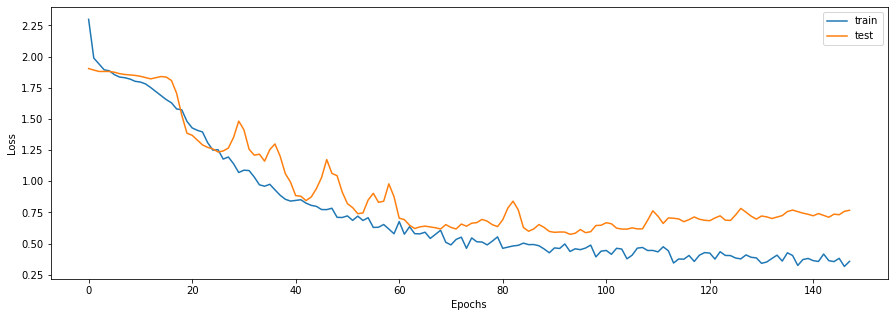

In [82]:
fig, ax1 = plt.subplots(1, figsize=(15, 5))
 
ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "test"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

#### Accuracy

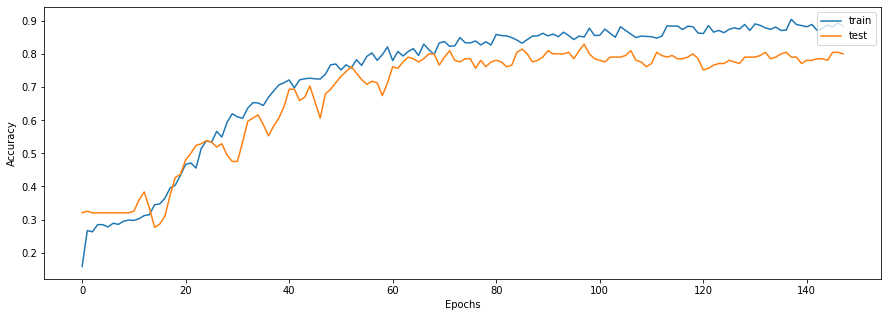

In [83]:
fig, ax2 = plt.subplots(1, figsize=(15, 5))
ax2.plot(history.history["acc"])
ax2.plot(history.history["val_acc"])
ax2.legend(["train", "test"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
plt.show()

Here in the above output, we can see that the model has performed well. In the accuracy part, we can see that the model has given us accuracy around 90% in training and 80% in testing data.

## <font color='darkblue'>Reference</font>
* [Link to the above codes](https://colab.research.google.com/drive/10iEZMY0aDJqxodlmRGsgrk-seNs5pR49?usp=sharing)
* [Graph Neural Networks](https://distill.pub/2021/gnn-intro/)